In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.cm import viridis
mpl.rcParams['figure.dpi'] = 200

### New Currency, Artisan Tokens


In [3]:
def simulate_tokens(days, lambda_value, collaborative_prob, collaborative_bonus=1.5):
    """
    Simulate the number of tokens a player will have after a given number of days.
    
    Parameters:
    - days (int): The number of days to simulate.
    - lambda_value (float): The lambda parameter for the Poisson distribution (average number of orders per day).
    - collaborative_prob (float): The probability that a given order is a collaborative project.
    - collaborative_bonus (float): The multiplier for tokens received from collaborative projects.
    
    Returns:
    - total_tokens (int): The total number of tokens accumulated over the given days.
    """
    total_tokens = 0
    
    for day in range(days):
        # Simulate the number of orders for the day using a Poisson distribution
        total_orders = np.random.poisson(lambda_value)
        total_orders = min(total_orders, 4)  # Cap the number of orders at 4
        
        # Initialize number of projects (0 at the start of the day)
        collaborative_projects, regular_orders = 0, 0
        for _ in range(total_orders):
            # Draw tokens per order from a uniform distribution
            tokens_per_order = np.random.uniform(8, 20)
            tokens_per_collaborative_order = tokens_per_order * collaborative_bonus
            
            # Determine if the order is a collaborative project
            if np.random.rand() < collaborative_prob:
                total_tokens += tokens_per_collaborative_order
            else:
                total_tokens += tokens_per_order
        
    return total_tokens

def monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus=1.5):
    """
    Run a Monte Carlo simulation over the player base.
    
    Parameters:
    - n_simulations (int): The number of simulations to run.
    - other parameters: See simulate_tokens function.
    
    Returns:
    - results (list): A list of total tokens accumulated in each simulation.
    """
    results = []
    for _ in range(n_simulations):
        total_tokens = simulate_tokens(days, lambda_value, collaborative_prob, collaborative_bonus)
        results.append(total_tokens)
    return results

The 75th percentile of the distribution for λ = 2 is 875.44 tokens
The 75th percentile of the distribution for λ = 2 is at the 0.67th percentile of the distribution for λ = 3


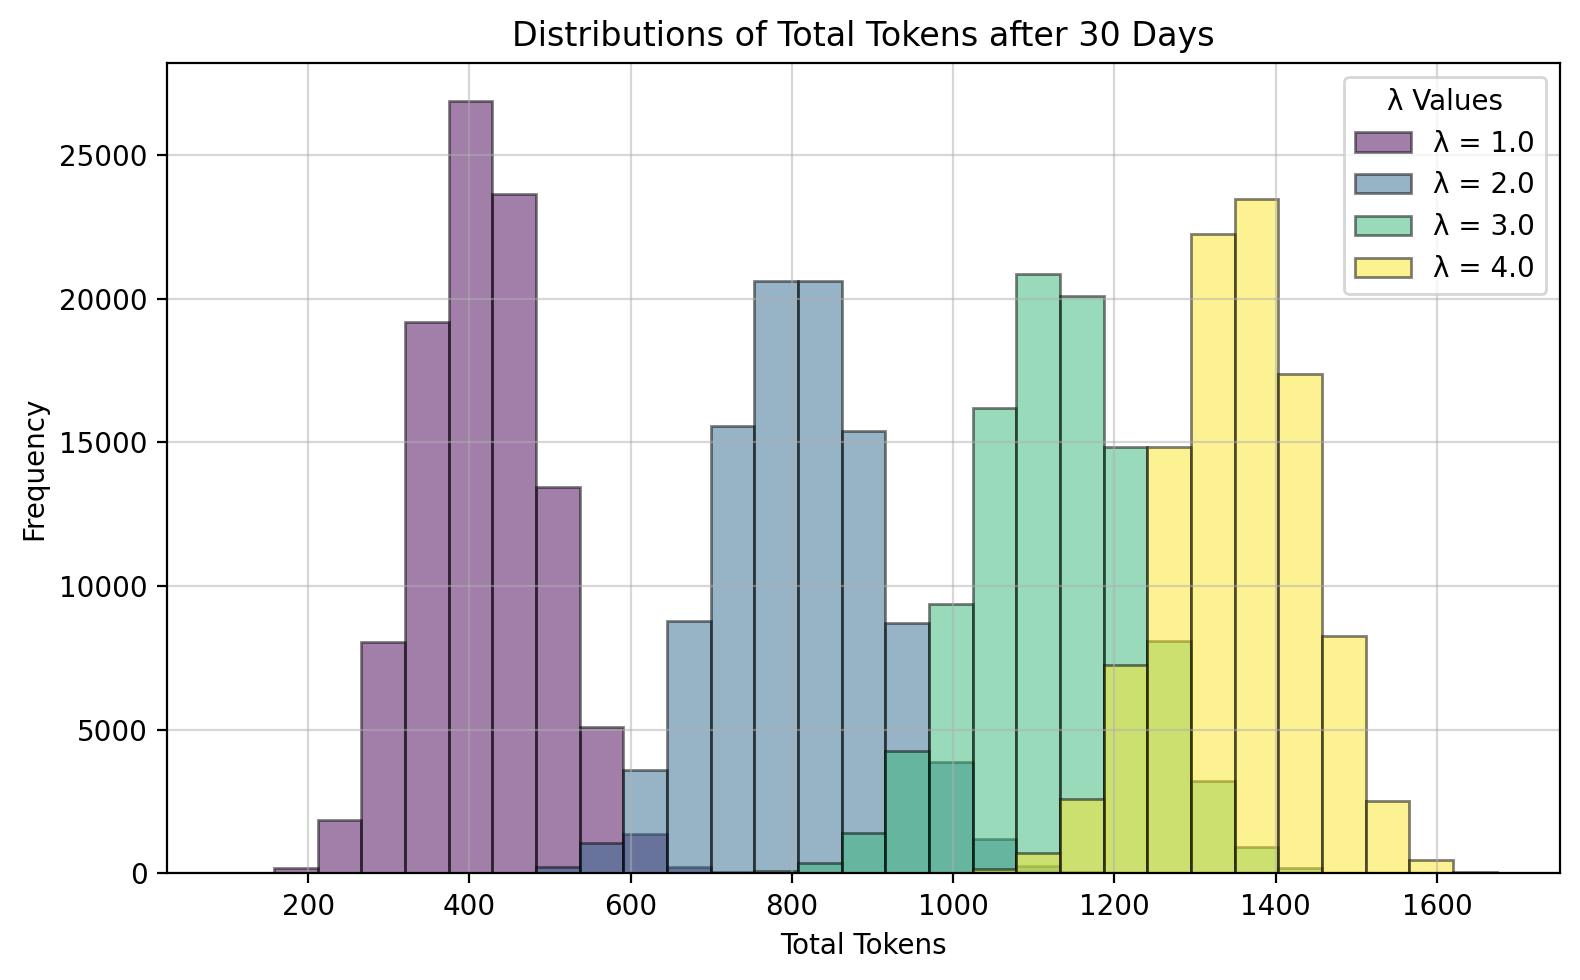

In [30]:
# Parameters
days = 30
lambda_values = [1.0, 2.0, 3.0, 4.0]  # Example lambda values
collaborative_prob = 0  # Collaboration probability set to 0
collaborative_bonus = 2.0
n_simulations = 100000  # Number of simulations for Monte Carlo

# Get the colors from the Viridis colormap
colors = [viridis(i) for i in np.linspace(0, 1, len(lambda_values))]

# Run Monte Carlo simulations and find min and max total tokens
all_results = []
for lambda_value in lambda_values:
    results = monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus)

    # Find the 75th percentile of the lambda = 2.0 distribution
    if lambda_value == 2.0: 
        lambda_2_75th_percentile = np.percentile(results, 75)
        print(f"The 75th percentile of the distribution for λ = 2 is {lambda_2_75th_percentile:.2f} tokens")

    elif lambda_value == 3.0:
        # Find the percentile of this value in the lambda = 3.0 distribution
        lambda_3_results = monte_carlo_simulation(n_simulations, days, 3.0, collaborative_prob, collaborative_bonus)
        sorted_lambda_3_results = np.sort(lambda_3_results)
        percentile_in_lambda_3 = np.searchsorted(sorted_lambda_3_results, lambda_2_75th_percentile) / n_simulations * 100
        print(f"The 75th percentile of the distribution for λ = 2 is at the {percentile_in_lambda_3:.2f}th percentile of the distribution for λ = 3")
    all_results.extend(results)
    
# Define common bins based on min and max total tokens
min_total_tokens = min(all_results)
max_total_tokens = max(all_results)
bins = np.linspace(min_total_tokens, max_total_tokens, 30)

# Run Monte Carlo simulations and plot histograms with common bins
plt.figure(figsize=(8, 5))
for i, lambda_value in enumerate(lambda_values):
    results = monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus)
    hist, bin_edges = np.histogram(results, bins=bins)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    plt.hist(results, bins=bins, alpha=0.5, label=f'λ = {lambda_value}', color=colors[i], edgecolor='black')

plt.xlabel(f'Total Tokens')
plt.ylabel('Frequency')
plt.title(f'Distributions of Total Tokens after {days} Days')
plt.legend(title="λ Values")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig(f'/Users/collinlewin/Projects/WoW_Rewards_Project/{days}_days.png')
plt.show()

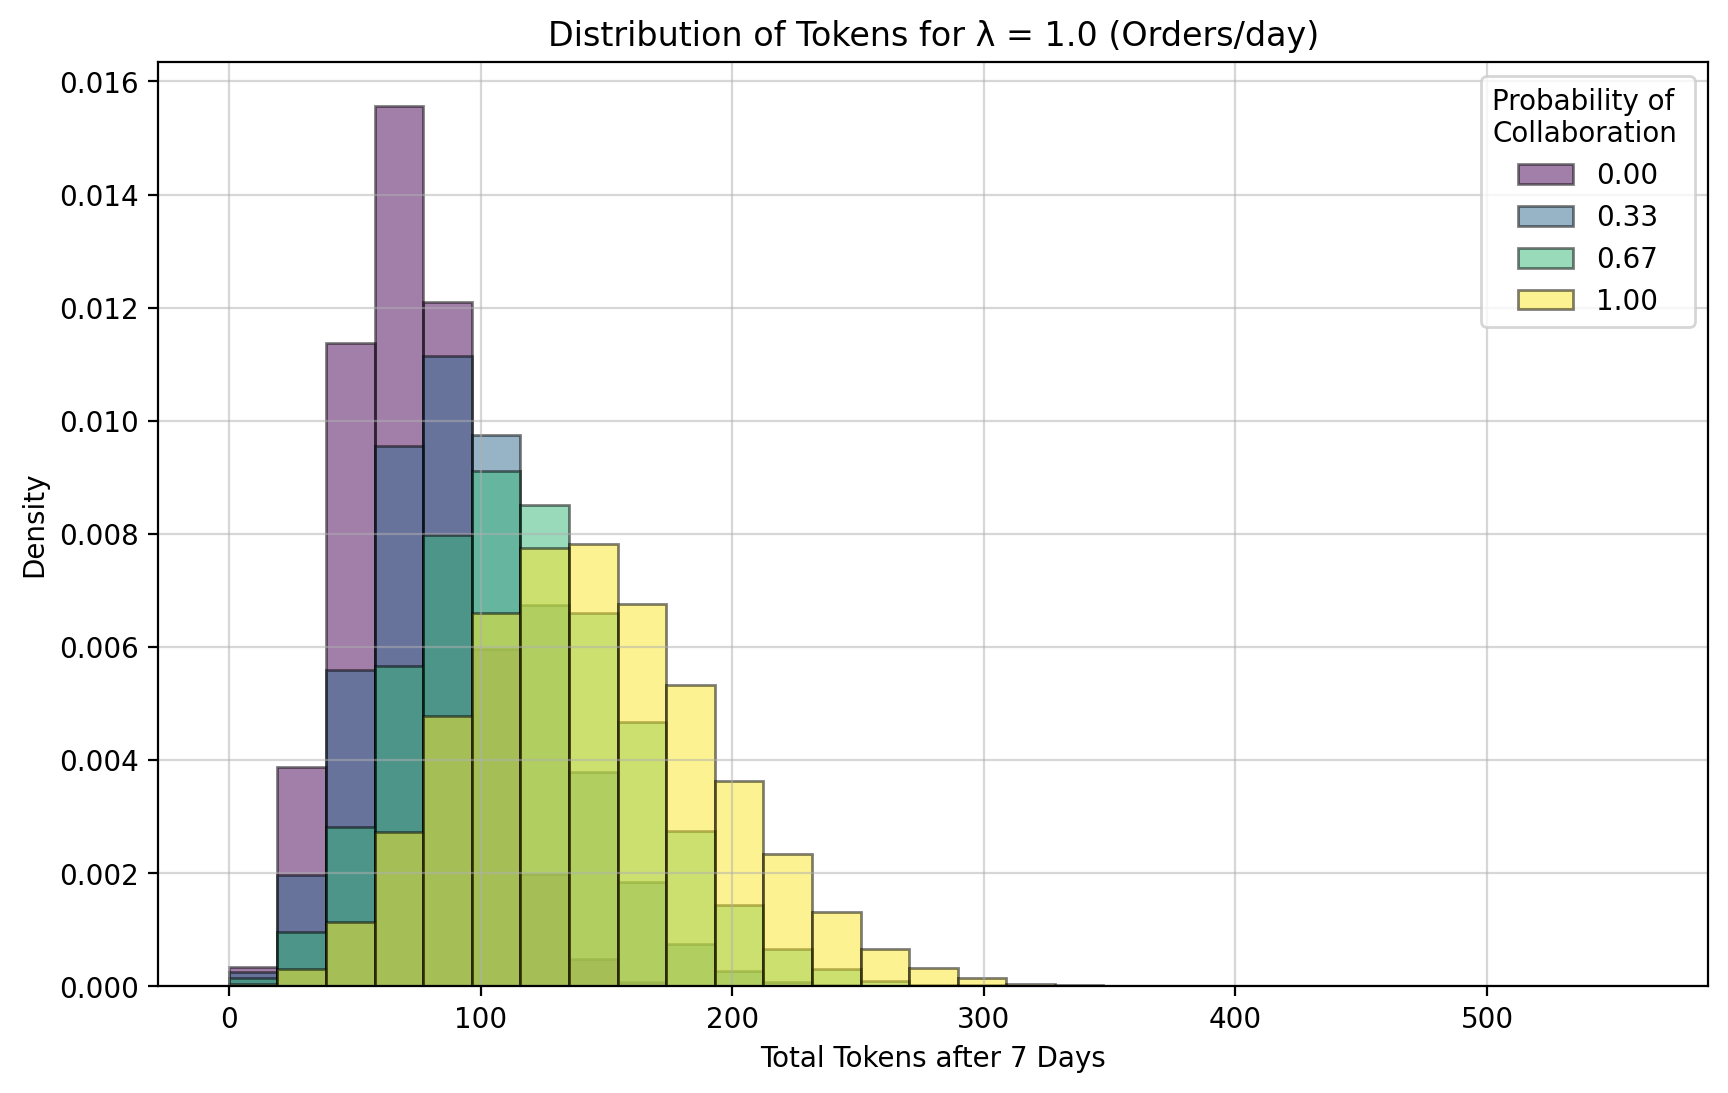

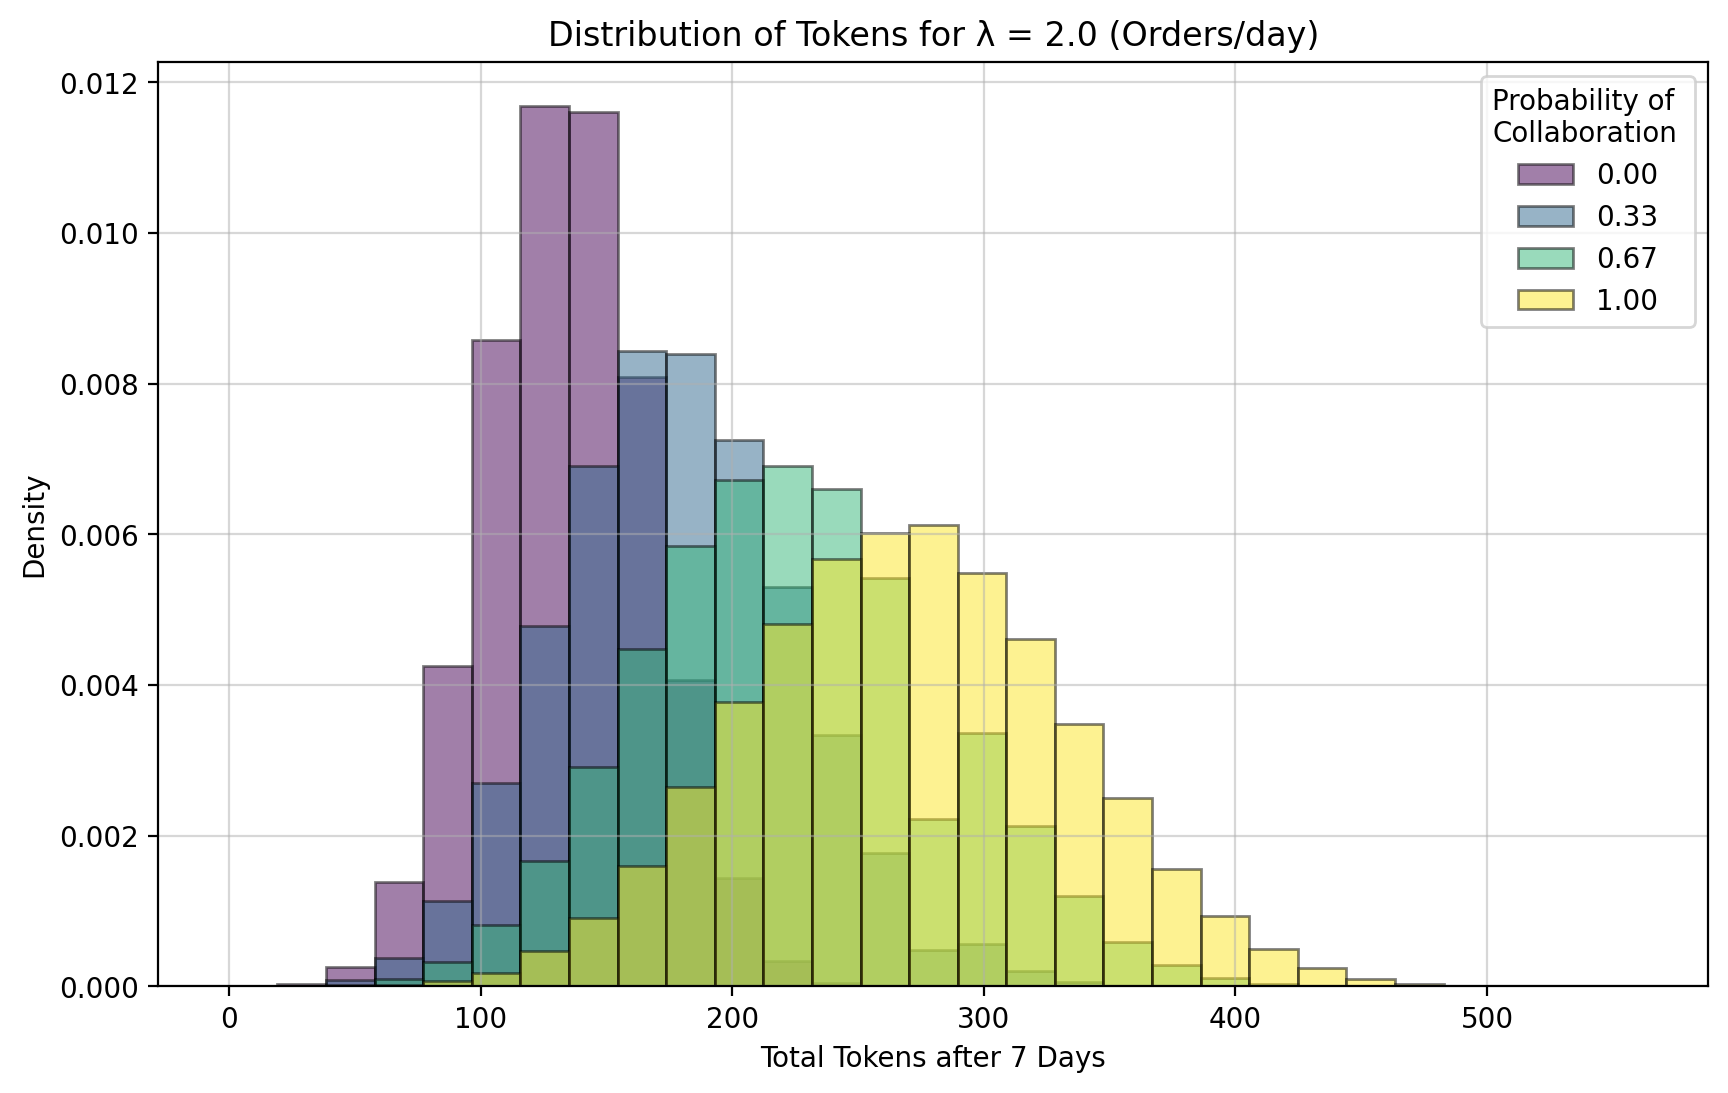

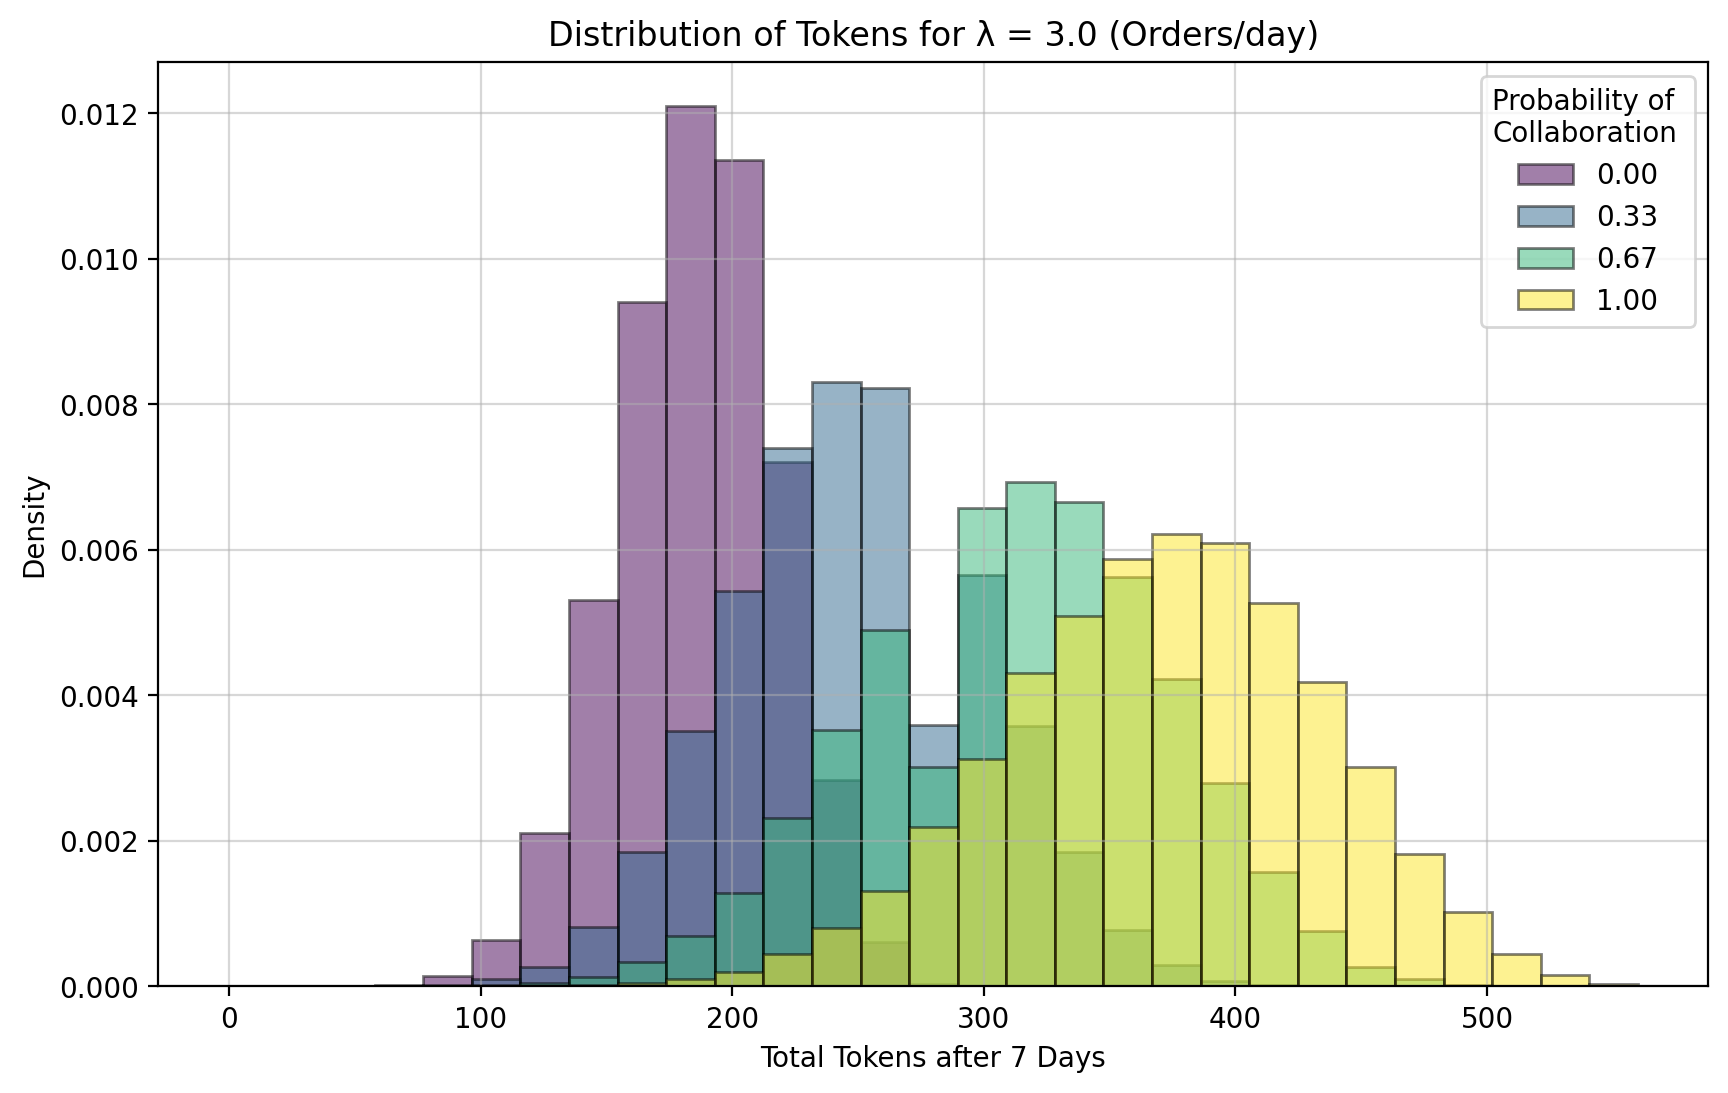

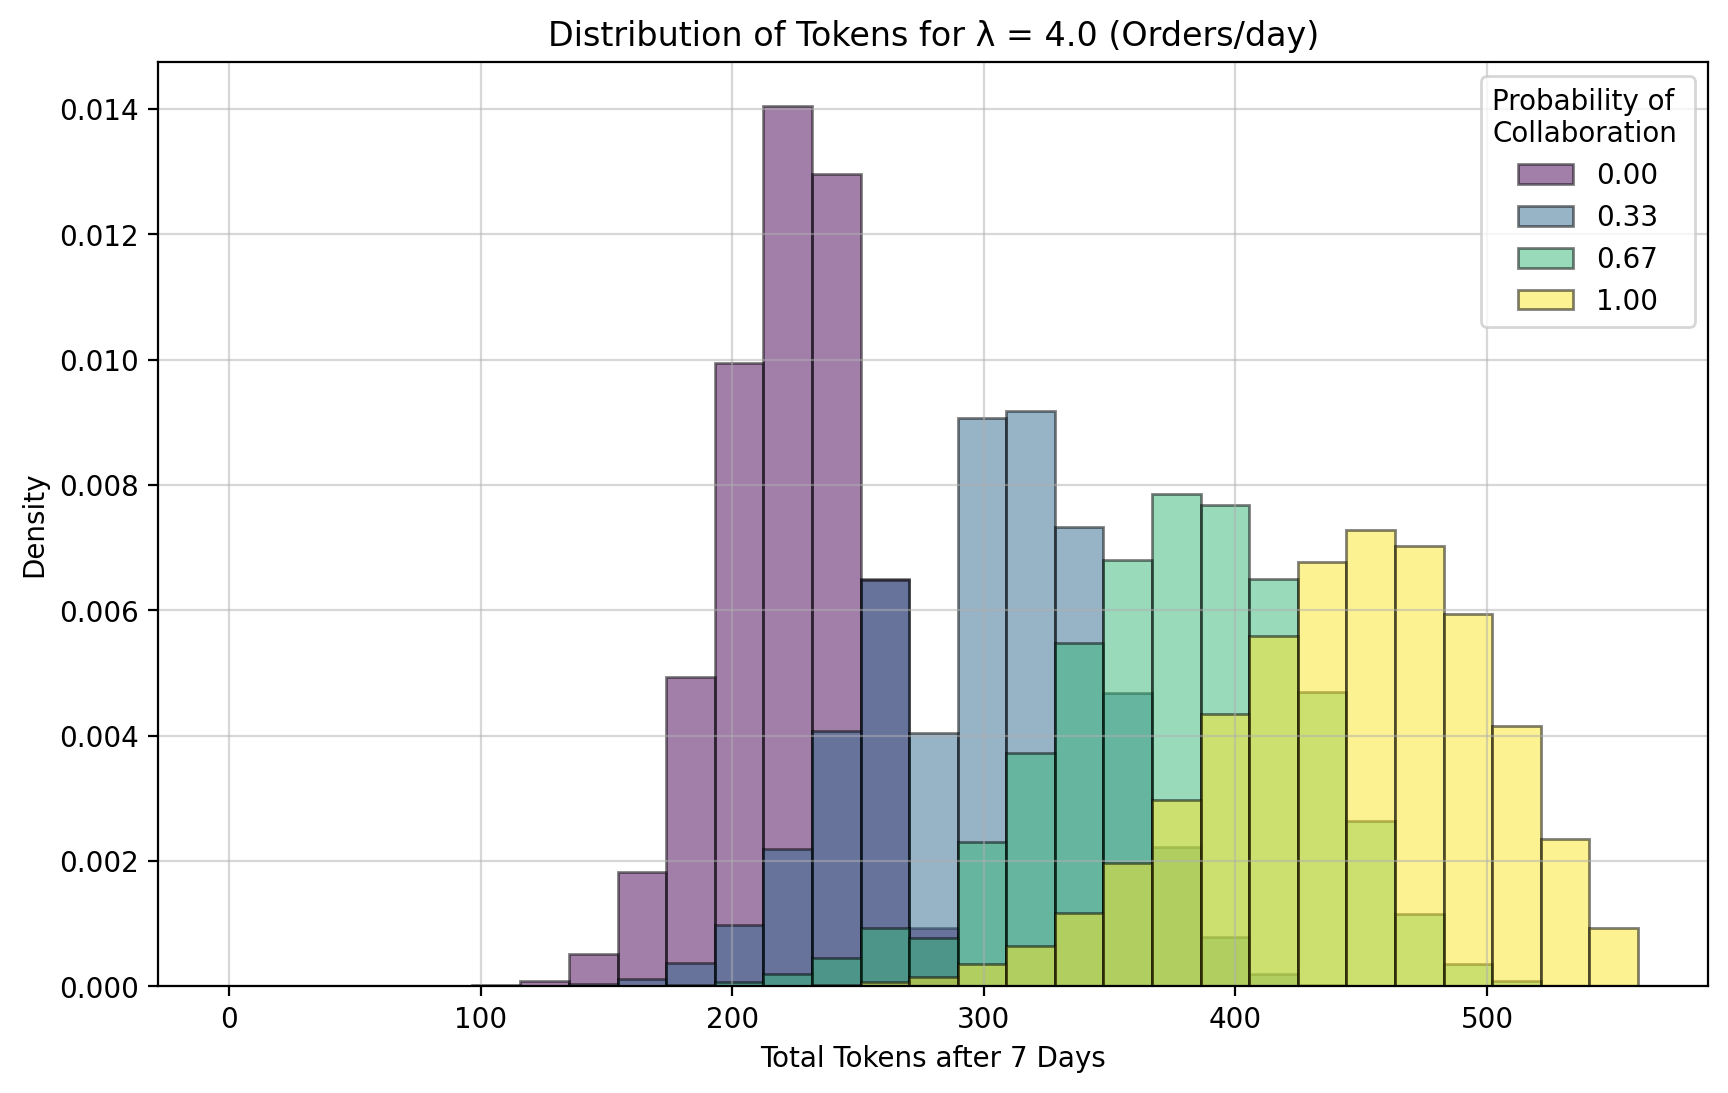

In [39]:
### DID NOT END UP USING IN FINAL REPORT

# Parameters
days = 7
lambda_values = [1.0, 2.0, 3.0, 4.0]  # Example lambda values
collaborative_probs = np.linspace(0, 1, 4)
collaborative_bonus = 2.0
tokens_per_order = 10
n_simulations = 100000  # Number of simulations

def monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus, tokens_per_order):
    np.random.seed(42) 
    total_tokens = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        daily_tokens = 0
        tokens_per_collaborative_order = tokens_per_order * collaborative_bonus
        
        for day in range(days):
            total_orders = np.random.poisson(lambda_value)
            total_orders = min(total_orders, 4)  # Cap the number of orders at 4
            
            collaborative_projects = np.random.binomial(total_orders, collaborative_prob)
            regular_orders = total_orders - collaborative_projects
            
            daily_tokens += (regular_orders * tokens_per_order) + (collaborative_projects * tokens_per_collaborative_order)
        
        total_tokens[i] = daily_tokens
    
    return total_tokens

# Run Monte Carlo simulations and find min and max total tokens
all_results = []
for lambda_value in lambda_values:
    for collaborative_prob in collaborative_probs:
        results = monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus, tokens_per_order)
        all_results.extend(results)

# Define common bins based on min and max total tokens
min_total_tokens = min(all_results)
max_total_tokens = max(all_results)
bins = np.linspace(min_total_tokens, max_total_tokens, 30)

# Get the colors from the Viridis colormap
colors = [viridis(i) for i in np.linspace(0, 1, len(collaborative_probs))]

# Run Monte Carlo simulations and plot histograms with common bins and smooth curves
for lambda_value in lambda_values:
    plt.figure(figsize=(10, 6))
    for i, collaborative_prob in enumerate(collaborative_probs):
        results = monte_carlo_simulation(n_simulations, days, lambda_value, collaborative_prob, collaborative_bonus, tokens_per_order)
        
        counts, bin_edges = np.histogram(results, bins=bins, density=True)
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
        
        plt.hist(results, bins=bins, alpha=0.5, label=f'{collaborative_prob:.2f}', color=colors[i], edgecolor='black', density=True)

    plt.xlabel(f'Total Tokens after {days} Days')
    plt.ylabel('Density')
    plt.title(f'Distribution of Tokens for λ = {lambda_value} (Orders/day)')
    plt.legend(title="Probability of \nCollaboration")
    plt.grid(True, alpha=0.5)
    plt.show()


### New Status Effect, Flow State

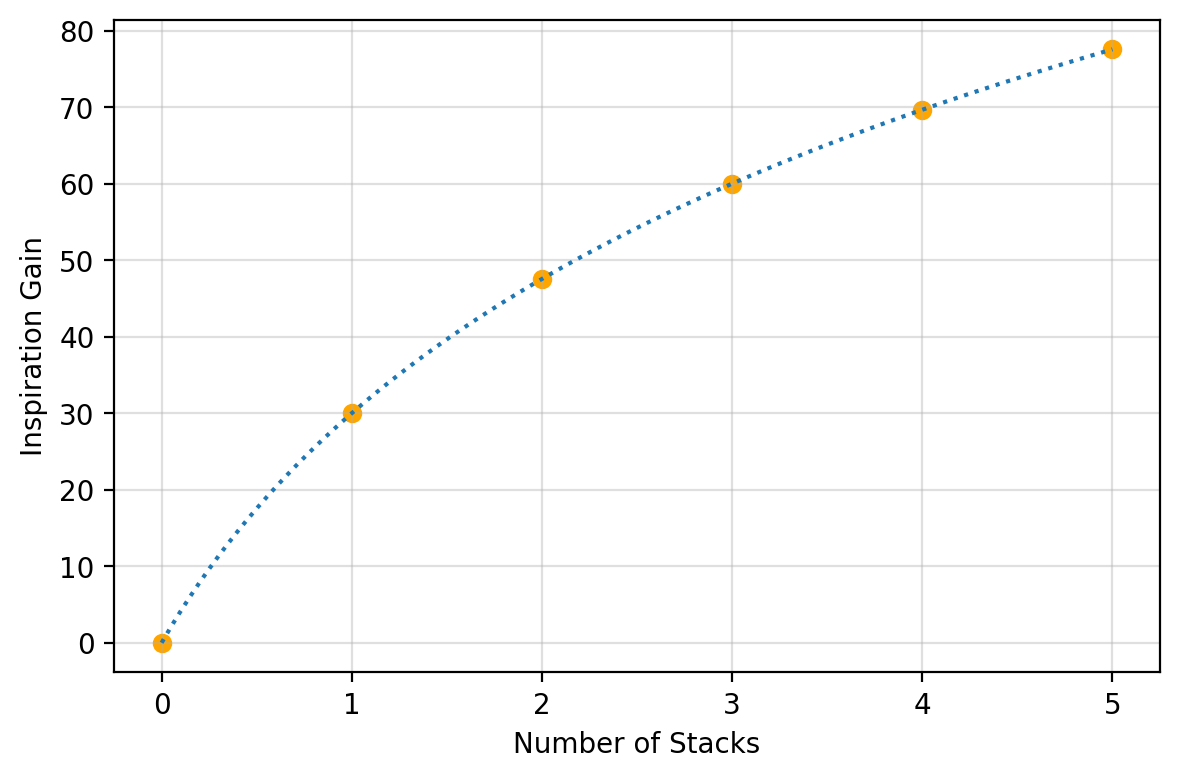

In [29]:
def flow_state(x, C):
    return C * np.log(x + 1)

const = 30 / np.log(2) # C = 43.3
x = np.linspace(0, 5, 100)
s = np.array([0, 1, 2, 3, 4, 5])
insp_gain = flow_state(s, const)
insp_gain_plot = flow_state(x, const)

plt.figure(figsize=(6, 4))
plt.plot(x, insp_gain_plot, ls='dotted')
plt.scatter(s, insp_gain, c='orange')
plt.xlabel('Number of Stacks')
plt.ylabel('Inspiration Gain')
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.savefig('/Users/collinlewin/Projects/WoW_Rewards_Project/inspiration_gain.png')
plt.show()